## Step 0: Importing Libraries and CSV file

In [1]:
# Importing libraries to handle data
import pandas as pd
import numpy as np

# Importing libraries for graph plottings
import matplotlib.pyplot as plt

import scipy
from scipy.stats import ttest_1samp
# From scipy import stats-related libraries
import seaborn as sns
import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from IPython.display import Image
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from statistics import mean

# Importing Linear Regression
from sklearn.linear_model import LinearRegression
# importing libraries for polynomial transform
from sklearn.preprocessing import PolynomialFeatures
# Importing libraries for creating pipeline
from sklearn.pipeline import Pipeline

pd.set_option('display.max_columns', None)

In [2]:
#Read CSV
df=pd.read_csv("unified_csv.csv")

#df.info()

df.insert(30, 'average_job_duration', df['job_duration'].divide(df['num_exec']))

#df['average_job_duration'] = pd.DataFrame(df['job_duration'] / df['num_exec'])


df = df.replace([np.inf, -np.inf], np.nan)
df['average_job_duration'] = df['average_job_duration'].fillna(0)


df['average_job_duration'].apply(lambda x: round(float(x),6))

df.drop(columns=['job_duration'],inplace = True)
df.info(max_cols=1000)

#loc, column, value, allow_duplicates=False

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4050 entries, 0 to 4049
Data columns (total 96 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   company_name                                 4050 non-null   object 
 1   status                                       4050 non-null   object 
 2   category_group_list                          4050 non-null   object 
 3   num_funding_rounds                           4050 non-null   float64
 4   total_funding_usd                            4050 non-null   float64
 5   founded_on                                   4050 non-null   float64
 6   employee_count                               4050 non-null   object 
 7   cat_commerce_shopping                        4050 non-null   float64
 8   cat_fin_services                             4050 non-null   float64
 9   cat_lending_invests                          4050 non-null   float64
 10  

In [3]:
df['average_job_duration']

0       5.994500
1       5.512783
2       4.759400
3       2.908579
4       9.949767
          ...   
4045    4.080800
4046    4.844525
4047    3.906300
4048    4.169556
4049    4.734556
Name: average_job_duration, Length: 4050, dtype: float64

In [4]:
df['employee_count'].value_counts()

def mapping (col):
    if col == "1-10":
        return 1
    elif col == "11-50":
        return 2
    elif col == "51-100":
        return 3
    elif col == "101-250":
        return 4
    elif col == "251-500":
        return 5
    elif col == "501-1000":
        return 6
    elif col == "10000+":
        return 7
    else:
        return 0

df['employee_count'] = df['employee_count'].apply(mapping)

best_4000 = df

## Step 1.1: Predicting closed / not closed / success using logistic regression

In [5]:
y = df['status_closed']
X = df.iloc[:,5:88]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on predicting closed company: {:.2f}'.format(logreg.score(X_test, y_test)))

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))


# Drop away all closed companies, avoid false positive
pred_arr = logreg.predict(df.iloc[:,5:88])
to_be_dropped = []
for i in range(len(df)):
    if pred_arr[i] == 1:
       to_be_dropped.append(i)
df.drop(to_be_dropped, inplace = True)
df = df.reset_index(drop = True)

Accuracy of logistic regression classifier on predicting closed company: 0.97
[[1176    0]
 [  39    0]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1176
           1       0.00      0.00      0.00        39

    accuracy                           0.97      1215
   macro avg       0.48      0.50      0.49      1215
weighted avg       0.94      0.97      0.95      1215



In [6]:
"""
#step 1.2 predicting being acquired or undergo ipo
y = df['has_acquisitions']
X = df.iloc[:,5:88]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on predicting being acquired: {:.2f}'.format(logreg.score(X_test, y_test)))

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))
"""
# cannot predict any has acquisitions

"\n#step 1.2 predicting being acquired or undergo ipo\ny = df['has_acquisitions']\nX = df.iloc[:,5:88]\n\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)\nlogreg = LogisticRegression()\nlogreg.fit(X_train, y_train)\n\ny_pred = logreg.predict(X_test)\nprint('Accuracy of logistic regression classifier on predicting being acquired: {:.2f}'.format(logreg.score(X_test, y_test)))\n\nprint(confusion_matrix(y_test, y_pred))\n\nprint(classification_report(y_test, y_pred))\n"

In [7]:
"""
y = df['has_ipo']
X = df.iloc[:,5:88]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on predicting closed company: {:.2f}'.format(logreg.score(X_test, y_test)))

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))
"""
# cannot predict any has ipo

"\ny = df['has_ipo']\nX = df.iloc[:,5:88]\n\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)\nlogreg = LogisticRegression()\nlogreg.fit(X_train, y_train)\n\ny_pred = logreg.predict(X_test)\nprint('Accuracy of logistic regression classifier on predicting closed company: {:.2f}'.format(logreg.score(X_test, y_test)))\n\nprint(confusion_matrix(y_test, y_pred))\n\nprint(classification_report(y_test, y_pred))\n"

## Step 1.2: Predicting those above 50% threshold of average momentum using logistic regression

In [8]:
X = df.iloc[:,5:88]
y2 = df['average_momentum']
y2_threshold = np.percentile(y2, [50])
y2 = y2.apply(lambda x: 1 if x >= y2_threshold else 0)


X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on av_momentum with 50% as threshold: {:.2f}'.format(logreg.score(X_test, y_test)))

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))


# Drop away all companies below threshold using av_momentum as predictor, avoid false positive
pred_arr = logreg.predict(df.iloc[:,5:88])
to_be_dropped = []
for i in range(len(df)):
    if pred_arr[i] == 0:
       to_be_dropped.append(i)
df.drop(to_be_dropped, inplace = True)
df = df.reset_index(drop = True)

Accuracy of logistic regression classifier on av_momentum with 50% as threshold: 0.58
[[253 362]
 [146 454]]
              precision    recall  f1-score   support

           0       0.63      0.41      0.50       615
           1       0.56      0.76      0.64       600

    accuracy                           0.58      1215
   macro avg       0.60      0.58      0.57      1215
weighted avg       0.60      0.58      0.57      1215



In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2688 entries, 0 to 2687
Data columns (total 96 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   company_name                                 2688 non-null   object 
 1   status                                       2688 non-null   object 
 2   category_group_list                          2688 non-null   object 
 3   num_funding_rounds                           2688 non-null   float64
 4   total_funding_usd                            2688 non-null   float64
 5   founded_on                                   2688 non-null   float64
 6   employee_count                               2688 non-null   int64  
 7   cat_commerce_shopping                        2688 non-null   float64
 8   cat_fin_services                             2688 non-null   float64
 9   cat_lending_invests                          2688 non-null   float64
 10  

In [10]:
#Preparing xlabel and ylabel
features= df.iloc[:,0:88]

ylabel=df[["average_momentum"]]

features.head()

,company_name,status,category_group_list,num_funding_rounds,total_funding_usd,founded_on,employee_count,cat_commerce_shopping,cat_fin_services,cat_lending_invests,cat_payments,fd_rd_latest_investment,fd_rd_investment_type_series_unknown,fd_rd_investment_type_grant,fd_rd_investment_type_debt_financing,fd_rd_investment_type_pre_seed,fd_rd_investment_type_post_ipo_equity,fd_rd_investment_type_convertible_note,fd_rd_investment_type_equity_crowdfunding,fd_rd_investment_type_private_equity,fd_rd_investment_type_undisclosed,fd_rd_investment_type_post_ipo_debt,fd_rd_investment_type_corporate_round,fd_rd_investment_type_product_crowdfunding,fd_rd_investment_type_non_equity_assistance,fd_rd_investment_type_initial_coin_offering,fd_rd_investment_type_secondary_market,fd_rd_investment_type_post_ipo_secondary,fd_rd_num_invested_by_top_100,event_count,average_job_duration,gender_male,gender_female,degree_type,subject_Business,subject_STEM,subject_Arts_SoSc,num_exec,first_fund_raised,first_fund_post_money,first_fund_investor_count,has_parent,continent_NA,continent_EU,continent_AS,continent_SA,continent_AF,continent_OC,country_code_USA,country_code_GBR,country_code_IND,country_code_CHN,country_code_CAN,country_code_SGP,country_code_AUS,country_code_DEU,country_code_BRA,country_code_CHE,country_code_ESP,country_code_FRA,country_code_NLD,country_code_HKG,country_code_ISR,country_code_KOR,country_code_SWE,country_code_JPN,country_code_MEX,country_code_IDN,city_London,city_New York,city_San Francisco,city_Singapore,city_Toronto,city_Beijing,city_Mumbai,city_Los Angeles,city_Chicago,city_Sydney,city_Paris,city_São Paulo,city_Tokyo,city_Berlin,city_Boston,city_Stockholm,city_Shanghai,city_Tel Aviv,city_Amsterdam,city_Madrid
0,All of Us,operating,"Financial Services,Lending and Investments",3.0,4025000.0,4.0767,1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.994500,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,3500000.0,0.0,0.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,PayPlug,acquired,"Commerce and Shopping,Financial Services,Payments",5.0,13316538.0,8.7507,2,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.512783,0.833333,0.166667,0.333333,0.166667,0.000000,0.000000,6.0,1832166.0,0.0,2.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,AID:Tech,operating,"Financial Services,Government and Military,Inf...",10.0,3180350.0,4.7068,2,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,2.908579,0.842105,0.157895,0.526316,0.052632,0.263158,0.052632,19.0,1180350.0,0.0,10.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,OwlTing,operating,"Commerce and Shopping,Mobile,Other,Travel and ...",4.0,5700000.0,10.4164,4,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.949767,1.000000,0.000000,1.000000,0.166667,0.333333,0.000000,6.0,2100000.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,SaveUp,operating,"Education,Financial Services,Internet Services...",2.0,7000000.0,9.8356,2,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.994514,0.714286,0.285714,1.142857,0.285714,0.000000,0.571429,7.0,2000000.0,0.0,2.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
#print value_counts of each column of feature dataframe
for i in features.columns: 
    x= features[i].value_counts()
    print("column: ",i,", value is:",x)
    print()

column:  company_name , value is: Upside            3
Jasper            2
Vault             2
Origin            2
Albert            2
                 ..
Finix Payments    1
ChangEd           1
Figopara          1
membersy          1
Mr. Noow          1
Name: company_name, Length: 2678, dtype: int64

column:  status , value is: operating    2383
acquired      189
closed         98
ipo            18
Name: status, dtype: int64

column:  category_group_list , value is: Financial Services                                                                                                                                                       248
Unknown                                                                                                                                                                  134
Financial Services,Lending and Investments                                                                                                                               130
Financial 

In [12]:
#print value_counts of each column of ylabel dataframe
for i in ylabel.columns: 
    x= ylabel[i].value_counts()
    print("column: ",i,", value is:",x)
    print()

column:  average_momentum , value is: -0.333333    4
 5.346164    2
 1.720930    2
 1.598508    2
 1.962120    2
            ..
 0.724799    1
 1.316703    1
 1.913175    1
 0.638834    1
 1.250000    1
Name: average_momentum, Length: 2671, dtype: int64



In [13]:
###### DO qcut for all ylabels ####### 

binary_labels = [0,1]

ylabel["average_momentum"]= pd.qcut(ylabel["average_momentum"], 2, labels = binary_labels)

ylabel

,average_momentum
0,1
1,1
2,0
3,0
4,1
...,...
2683,0
2684,0
2685,1
2686,0


In [14]:
#Train model to predict each ylabel

X_train, X_test, y_train, y_test = train_test_split(features.drop(columns=['company_name', 'status', 'category_group_list', 'num_funding_rounds','total_funding_usd']), ylabel["average_momentum"], test_size=0.3, random_state=5)
model=DecisionTreeClassifier()
model.fit(X_train, y_train)
    
# use the trained model to predict test set for evaluation
pred_test = model.predict(X_test)

# print out evaluation result
print("Predicting: ", i)
    
print("Accuracy:{}".format(accuracy_score(y_test, pred_test, normalize=True, sample_weight=None)))
print("Classification Report:\n{}".format(classification_report(y_test, pred_test)))
print("Confusion Matrix:\n{}".format(confusion_matrix(y_test, pred_test)))
print("--------------------------------------------------------------------------")
prediction=model.predict(features.drop(columns=['company_name', 'status', 'category_group_list', 'num_funding_rounds','total_funding_usd']))
result = features
result["tree_prediction"]=prediction

Predicting:  average_momentum
Accuracy:0.5130111524163569
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.51      0.50       392
           1       0.53      0.52      0.52       415

    accuracy                           0.51       807
   macro avg       0.51      0.51      0.51       807
weighted avg       0.51      0.51      0.51       807

Confusion Matrix:
[[199 193]
 [200 215]]
--------------------------------------------------------------------------


In [15]:
result["tree_prediction"].value_counts()

0    1351
1    1337
Name: tree_prediction, dtype: int64

In [16]:
result["average_momentum"]= df["average_momentum"]
result= result.reset_index()
result= result.drop(columns= ["index"])
result.head()

,company_name,status,category_group_list,num_funding_rounds,total_funding_usd,founded_on,employee_count,cat_commerce_shopping,cat_fin_services,cat_lending_invests,cat_payments,fd_rd_latest_investment,fd_rd_investment_type_series_unknown,fd_rd_investment_type_grant,fd_rd_investment_type_debt_financing,fd_rd_investment_type_pre_seed,fd_rd_investment_type_post_ipo_equity,fd_rd_investment_type_convertible_note,fd_rd_investment_type_equity_crowdfunding,fd_rd_investment_type_private_equity,fd_rd_investment_type_undisclosed,fd_rd_investment_type_post_ipo_debt,fd_rd_investment_type_corporate_round,fd_rd_investment_type_product_crowdfunding,fd_rd_investment_type_non_equity_assistance,fd_rd_investment_type_initial_coin_offering,fd_rd_investment_type_secondary_market,fd_rd_investment_type_post_ipo_secondary,fd_rd_num_invested_by_top_100,event_count,average_job_duration,gender_male,gender_female,degree_type,subject_Business,subject_STEM,subject_Arts_SoSc,num_exec,first_fund_raised,first_fund_post_money,first_fund_investor_count,has_parent,continent_NA,continent_EU,continent_AS,continent_SA,continent_AF,continent_OC,country_code_USA,country_code_GBR,country_code_IND,country_code_CHN,country_code_CAN,country_code_SGP,country_code_AUS,country_code_DEU,country_code_BRA,country_code_CHE,country_code_ESP,country_code_FRA,country_code_NLD,country_code_HKG,country_code_ISR,country_code_KOR,country_code_SWE,country_code_JPN,country_code_MEX,country_code_IDN,city_London,city_New York,city_San Francisco,city_Singapore,city_Toronto,city_Beijing,city_Mumbai,city_Los Angeles,city_Chicago,city_Sydney,city_Paris,city_São Paulo,city_Tokyo,city_Berlin,city_Boston,city_Stockholm,city_Shanghai,city_Tel Aviv,city_Amsterdam,city_Madrid,tree_prediction,average_momentum
0,All of Us,operating,"Financial Services,Lending and Investments",3.0,4025000.0,4.0767,1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.994500,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,3500000.0,0.0,0.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2.964229
1,PayPlug,acquired,"Commerce and Shopping,Financial Services,Payments",5.0,13316538.0,8.7507,2,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.512783,0.833333,0.166667,0.333333,0.166667,0.000000,0.000000,6.0,1832166.0,0.0,2.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0.934681
2,AID:Tech,operating,"Financial Services,Government and Military,Inf...",10.0,3180350.0,4.7068,2,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,2.908579,0.842105,0.157895,0.526316,0.052632,0.263158,0.052632,19.0,1180350.0,0.0,10.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.228600
3,OwlTing,operating,"Commerce and Shopping,Mobile,Other,Travel and ...",4.0,5700000.0,10.4164,4,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.949767,1.000000,0.000000,1.000000,0.166667,0.333333,0.000000,6.0,2100000.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.341418
4,SaveUp,operating,"Education,Financial Services,Internet Services...",2.0,7000000.0,9.8356,2,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.994514,0.714286,0.285714,1.142857,0.285714,0.000000,0.571429,7.0,2000000.0,0.0,2.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.854750


## Step 2: Predicting those above 50% threshold of average momentum by Decision Tree

In [17]:
# Drop away those below median as the average momentum threshold, predicted by decision tree
# Double Confirmation of NO FALSE POSITIVE
to_be_dropped = []
for i in range (len(result)):
    if result['tree_prediction'].iloc[i] == 0:
        to_be_dropped.append(i)
result.drop(to_be_dropped, inplace = True)
result = result.reset_index(drop = True)

In [18]:
df = result
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 90 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   company_name                                 1337 non-null   object 
 1   status                                       1337 non-null   object 
 2   category_group_list                          1337 non-null   object 
 3   num_funding_rounds                           1337 non-null   float64
 4   total_funding_usd                            1337 non-null   float64
 5   founded_on                                   1337 non-null   float64
 6   employee_count                               1337 non-null   int64  
 7   cat_commerce_shopping                        1337 non-null   float64
 8   cat_fin_services                             1337 non-null   float64
 9   cat_lending_invests                          1337 non-null   float64
 10  

## Step 3: Predicting the best momentum venture companies by Polynomial Regression

Accuracy Score of Degree 1 model:  0.11656476277232974


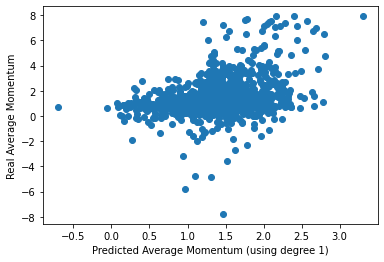

In [19]:
# ###### Try: Degree 1 #######

features = df.iloc[:,5:-1]

# # define independent variables/attirbutes/features
x = features[:]
y = df[["average_momentum"]]

# #Change degree of x to fit into the model

pre_process= PolynomialFeatures(degree=1)
x_poly= pre_process.fit_transform(x)

# # Training the model
pr_model= LinearRegression()

# # Fit our preprocessed data to the polynomial regression model
pr_model.fit(x_poly, y)
print("Accuracy Score of Degree 1 model: ", pr_model.score(x_poly, y))
# # Store our predicted ROI values in the variable y_pred
y_pred_1 = pr_model.predict(x_poly)


# # Plot our model on our data
plt.scatter(y_pred_1, df.iloc[:,-1])
plt.xlabel("Predicted Average Momentum (using degree 1)")
plt.ylabel("Real Average Momentum")
plt.show()

Accuracy Score of Degree 2 model:  0.6147630590157671


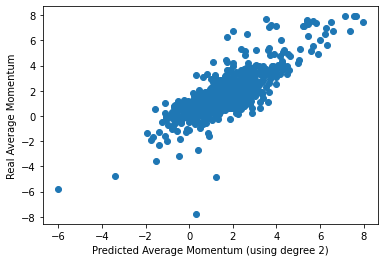

In [20]:
# ###### Try: Degree 2 #######

features = df.iloc[:,5:-1]

# # define independent variables/attirbutes/features
x = features[:]
y = df[["average_momentum"]]

# #Change degree of x to fit into the model

pre_process= PolynomialFeatures(degree=2)
x_poly= pre_process.fit_transform(x)

# # Training the model
pr_model= LinearRegression()

# # Fit our preprocessed data to the polynomial regression model
pr_model.fit(x_poly, y)
print("Accuracy Score of Degree 2 model: ", pr_model.score(x_poly, y))
# # Store our predicted ROI values in the variable y_pred
y_pred_2 = pr_model.predict(x_poly)


# # Plot our model on our data
plt.scatter(y_pred_2, df.iloc[:,-1])
plt.xlabel("Predicted Average Momentum (using degree 2)")
plt.ylabel("Real Average Momentum")
plt.show()

Accuracy Score of Degree 3 model:  0.15902819293680948


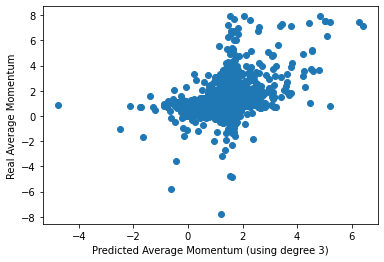

In [21]:
# ###### Try: Degree 3 #######

features = df.iloc[:,5:-1]

# # define independent variables/attirbutes/features
x = features[:]
y = df[["average_momentum"]]

# #Change degree of x to fit into the model

pre_process= PolynomialFeatures(degree=3)
x_poly= pre_process.fit_transform(x)

# # Training the model
pr_model= LinearRegression()

# # Fit our preprocessed data to the polynomial regression model
pr_model.fit(x_poly, y)
print("Accuracy Score of Degree 3 model: ", pr_model.score(x_poly, y))
# # Store our predicted ROI values in the variable y_pred
y_pred_3 = pr_model.predict(x_poly)


# # Plot our model on our data
plt.scatter(y_pred_3, df.iloc[:,-1])
plt.xlabel("Predicted Average Momentum (using degree 3)")
plt.ylabel("Real Average Momentum")
plt.show()

## Step 4: Rank the predicted momentum values

In [22]:
df['predicted_momentum_using_degree_2'] = y_pred_2
df = df.sort_values(by='predicted_momentum_using_degree_2', ascending=False)

In [23]:
df = df.reset_index(drop = True)
#df = df[(df['founded_on'] <=5)]

## Step 5: Extract the top 100 companies to a CSV file

In [24]:
df.head()

,company_name,status,category_group_list,num_funding_rounds,total_funding_usd,founded_on,employee_count,cat_commerce_shopping,cat_fin_services,cat_lending_invests,cat_payments,fd_rd_latest_investment,fd_rd_investment_type_series_unknown,fd_rd_investment_type_grant,fd_rd_investment_type_debt_financing,fd_rd_investment_type_pre_seed,fd_rd_investment_type_post_ipo_equity,fd_rd_investment_type_convertible_note,fd_rd_investment_type_equity_crowdfunding,fd_rd_investment_type_private_equity,fd_rd_investment_type_undisclosed,fd_rd_investment_type_post_ipo_debt,fd_rd_investment_type_corporate_round,fd_rd_investment_type_product_crowdfunding,fd_rd_investment_type_non_equity_assistance,fd_rd_investment_type_initial_coin_offering,fd_rd_investment_type_secondary_market,fd_rd_investment_type_post_ipo_secondary,fd_rd_num_invested_by_top_100,event_count,average_job_duration,gender_male,gender_female,degree_type,subject_Business,subject_STEM,subject_Arts_SoSc,num_exec,first_fund_raised,first_fund_post_money,first_fund_investor_count,has_parent,continent_NA,continent_EU,continent_AS,continent_SA,continent_AF,continent_OC,country_code_USA,country_code_GBR,country_code_IND,country_code_CHN,country_code_CAN,country_code_SGP,country_code_AUS,country_code_DEU,country_code_BRA,country_code_CHE,country_code_ESP,country_code_FRA,country_code_NLD,country_code_HKG,country_code_ISR,country_code_KOR,country_code_SWE,country_code_JPN,country_code_MEX,country_code_IDN,city_London,city_New York,city_San Francisco,city_Singapore,city_Toronto,city_Beijing,city_Mumbai,city_Los Angeles,city_Chicago,city_Sydney,city_Paris,city_São Paulo,city_Tokyo,city_Berlin,city_Boston,city_Stockholm,city_Shanghai,city_Tel Aviv,city_Amsterdam,city_Madrid,tree_prediction,average_momentum,predicted_momentum_using_degree_2
0,Betmatch,operating,Unknown,2.0,4150000.0,2.9671,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.904100,1.000000,0.000000,2.000000,0.000000,0.000000,1.000000,1.0,4150000.0,0.0,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,7.442526,7.941968
1,Beatdapp,operating,Unknown,4.0,2421799.0,3.0767,2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4.372262,0.875000,0.125000,0.625000,0.250000,0.125000,0.000000,8.0,2419299.0,0.0,10.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,7.920122,7.661982
2,Mobius,operating,"Apps,Financial Services,Payments,Software",2.0,39500000.0,4.0767,3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,5.994525,1.000000,0.000000,0.250000,0.000000,0.250000,0.000000,4.0,500000.0,0.0,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,7.904976,7.573066
3,TrustToken,operating,"Commerce and Shopping,Financial Services,Other...",4.0,21700000.0,4.0767,2,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,5.0,3.621271,0.882353,0.117647,0.411765,0.117647,0.176471,0.058824,17.0,1700000.0,0.0,5.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,6.765487,7.346533
4,BrikkApp,operating,"Commerce and Shopping,Financial Services,Other...",2.0,542698.0,3.0767,1,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,539388.0,0.0,2.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,7.921425,7.157653


In [25]:
best_100 = df.iloc[:100]
output_best_100 = best_100.loc[:,['company_name','employee_count','num_funding_rounds','fd_rd_latest_investment','cat_lending_invests','cat_payments','cat_commerce_shopping','first_fund_investor_count','first_fund_post_money','num_exec','fd_rd_num_invested_by_top_100','average_momentum']]
output_best_100.to_csv("predicted_best_100.csv", index=False)
output_all = df.loc[:,['company_name','employee_count','num_funding_rounds','fd_rd_latest_investment','cat_lending_invests','cat_payments','cat_commerce_shopping','first_fund_investor_count','first_fund_post_money','num_exec','fd_rd_num_invested_by_top_100','average_momentum']]
output_all.to_csv("all_validated_companies_ranked.csv", index=False)

## Step 6: Explaining Important Features

In [26]:
"""
x = best_100.values 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
best_100_scaled = pd.DataFrame(x_scaled)


x = best_1300.values 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
best_1300_scaled = pd.DataFrame(x_scaled)


x = best_4000.values 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
best_4000_scaled = pd.DataFrame(x_scaled)
"""



'\nx = best_100.values \nmin_max_scaler = preprocessing.MinMaxScaler()\nx_scaled = min_max_scaler.fit_transform(x)\nbest_100_scaled = pd.DataFrame(x_scaled)\n\n\nx = best_1300.values \nmin_max_scaler = preprocessing.MinMaxScaler()\nx_scaled = min_max_scaler.fit_transform(x)\nbest_1300_scaled = pd.DataFrame(x_scaled)\n\n\nx = best_4000.values \nmin_max_scaler = preprocessing.MinMaxScaler()\nx_scaled = min_max_scaler.fit_transform(x)\nbest_4000_scaled = pd.DataFrame(x_scaled)\n'

In [27]:
best_100 = best_100.iloc[:,6:-3]
best_1300 = df.iloc[:,6:-3]
best_4000 = best_4000.iloc[:,6:-8]
best_100.head()

index = best_100.columns.get_loc('average_job_duration')
print("av job of best 100: ", best_100.iloc[:,index].mean())
print("av job of best 1300: ", best_1300.iloc[:,index].mean())
print("av job of best 4000: ", best_4000.iloc[:,index].mean())



av job of best 100:  4.399066522041193
av job of best 1300:  4.44451519936995
av job of best 4000:  4.648637417498215


In [28]:
"""
# Not Normalized Values

for i in range (len(best_100.columns)):
    if best_100.iloc[:,i].mean() > best_1300.iloc[:,i].mean() \
    and best_100.iloc[:,i].mean() > best_4000.iloc[:,i].mean() \
    and best_1300.iloc[:,i].mean() > best_4000.iloc[:,i].mean():
        print(str(best_100.columns[i])+" is a positively important feature !\nThe average value at TOP 100: " +str(best_100.iloc[:,i].mean()) +";"+\
             "\nwhile the average value at Prelim Filtered: " +str(best_1300.iloc[:,i].mean()) +";"+\
              "\nand that the average value at All Fintech: " +str(best_4000.iloc[:,i].mean()) +"\n")
"""

'\n# Not Normalized Values\n\nfor i in range (len(best_100.columns)):\n    if best_100.iloc[:,i].mean() > best_1300.iloc[:,i].mean()     and best_100.iloc[:,i].mean() > best_4000.iloc[:,i].mean()     and best_1300.iloc[:,i].mean() > best_4000.iloc[:,i].mean():\n        print(str(best_100.columns[i])+" is a positively important feature !\nThe average value at TOP 100: " +str(best_100.iloc[:,i].mean()) +";"+             "\nwhile the average value at Prelim Filtered: " +str(best_1300.iloc[:,i].mean()) +";"+              "\nand that the average value at All Fintech: " +str(best_4000.iloc[:,i].mean()) +"\n")\n'

In [29]:
best_100.head()

,employee_count,cat_commerce_shopping,cat_fin_services,cat_lending_invests,cat_payments,fd_rd_latest_investment,fd_rd_investment_type_series_unknown,fd_rd_investment_type_grant,fd_rd_investment_type_debt_financing,fd_rd_investment_type_pre_seed,fd_rd_investment_type_post_ipo_equity,fd_rd_investment_type_convertible_note,fd_rd_investment_type_equity_crowdfunding,fd_rd_investment_type_private_equity,fd_rd_investment_type_undisclosed,fd_rd_investment_type_post_ipo_debt,fd_rd_investment_type_corporate_round,fd_rd_investment_type_product_crowdfunding,fd_rd_investment_type_non_equity_assistance,fd_rd_investment_type_initial_coin_offering,fd_rd_investment_type_secondary_market,fd_rd_investment_type_post_ipo_secondary,fd_rd_num_invested_by_top_100,event_count,average_job_duration,gender_male,gender_female,degree_type,subject_Business,subject_STEM,subject_Arts_SoSc,num_exec,first_fund_raised,first_fund_post_money,first_fund_investor_count,has_parent,continent_NA,continent_EU,continent_AS,continent_SA,continent_AF,continent_OC,country_code_USA,country_code_GBR,country_code_IND,country_code_CHN,country_code_CAN,country_code_SGP,country_code_AUS,country_code_DEU,country_code_BRA,country_code_CHE,country_code_ESP,country_code_FRA,country_code_NLD,country_code_HKG,country_code_ISR,country_code_KOR,country_code_SWE,country_code_JPN,country_code_MEX,country_code_IDN,city_London,city_New York,city_San Francisco,city_Singapore,city_Toronto,city_Beijing,city_Mumbai,city_Los Angeles,city_Chicago,city_Sydney,city_Paris,city_São Paulo,city_Tokyo,city_Berlin,city_Boston,city_Stockholm,city_Shanghai,city_Tel Aviv,city_Amsterdam,city_Madrid
0,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.904100,1.000000,0.000000,2.000000,0.000000,0.000000,1.000000,1.0,4150000.0,0.0,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4.372262,0.875000,0.125000,0.625000,0.250000,0.125000,0.000000,8.0,2419299.0,0.0,10.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,5.994525,1.000000,0.000000,0.250000,0.000000,0.250000,0.000000,4.0,500000.0,0.0,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,5.0,3.621271,0.882353,0.117647,0.411765,0.117647,0.176471,0.058824,17.0,1700000.0,0.0,5.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,539388.0,0.0,2.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [30]:
best_1300.head()

,employee_count,cat_commerce_shopping,cat_fin_services,cat_lending_invests,cat_payments,fd_rd_latest_investment,fd_rd_investment_type_series_unknown,fd_rd_investment_type_grant,fd_rd_investment_type_debt_financing,fd_rd_investment_type_pre_seed,fd_rd_investment_type_post_ipo_equity,fd_rd_investment_type_convertible_note,fd_rd_investment_type_equity_crowdfunding,fd_rd_investment_type_private_equity,fd_rd_investment_type_undisclosed,fd_rd_investment_type_post_ipo_debt,fd_rd_investment_type_corporate_round,fd_rd_investment_type_product_crowdfunding,fd_rd_investment_type_non_equity_assistance,fd_rd_investment_type_initial_coin_offering,fd_rd_investment_type_secondary_market,fd_rd_investment_type_post_ipo_secondary,fd_rd_num_invested_by_top_100,event_count,average_job_duration,gender_male,gender_female,degree_type,subject_Business,subject_STEM,subject_Arts_SoSc,num_exec,first_fund_raised,first_fund_post_money,first_fund_investor_count,has_parent,continent_NA,continent_EU,continent_AS,continent_SA,continent_AF,continent_OC,country_code_USA,country_code_GBR,country_code_IND,country_code_CHN,country_code_CAN,country_code_SGP,country_code_AUS,country_code_DEU,country_code_BRA,country_code_CHE,country_code_ESP,country_code_FRA,country_code_NLD,country_code_HKG,country_code_ISR,country_code_KOR,country_code_SWE,country_code_JPN,country_code_MEX,country_code_IDN,city_London,city_New York,city_San Francisco,city_Singapore,city_Toronto,city_Beijing,city_Mumbai,city_Los Angeles,city_Chicago,city_Sydney,city_Paris,city_São Paulo,city_Tokyo,city_Berlin,city_Boston,city_Stockholm,city_Shanghai,city_Tel Aviv,city_Amsterdam,city_Madrid
0,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.904100,1.000000,0.000000,2.000000,0.000000,0.000000,1.000000,1.0,4150000.0,0.0,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4.372262,0.875000,0.125000,0.625000,0.250000,0.125000,0.000000,8.0,2419299.0,0.0,10.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,5.994525,1.000000,0.000000,0.250000,0.000000,0.250000,0.000000,4.0,500000.0,0.0,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,5.0,3.621271,0.882353,0.117647,0.411765,0.117647,0.176471,0.058824,17.0,1700000.0,0.0,5.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,539388.0,0.0,2.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [31]:
df.head()

,company_name,status,category_group_list,num_funding_rounds,total_funding_usd,founded_on,employee_count,cat_commerce_shopping,cat_fin_services,cat_lending_invests,cat_payments,fd_rd_latest_investment,fd_rd_investment_type_series_unknown,fd_rd_investment_type_grant,fd_rd_investment_type_debt_financing,fd_rd_investment_type_pre_seed,fd_rd_investment_type_post_ipo_equity,fd_rd_investment_type_convertible_note,fd_rd_investment_type_equity_crowdfunding,fd_rd_investment_type_private_equity,fd_rd_investment_type_undisclosed,fd_rd_investment_type_post_ipo_debt,fd_rd_investment_type_corporate_round,fd_rd_investment_type_product_crowdfunding,fd_rd_investment_type_non_equity_assistance,fd_rd_investment_type_initial_coin_offering,fd_rd_investment_type_secondary_market,fd_rd_investment_type_post_ipo_secondary,fd_rd_num_invested_by_top_100,event_count,average_job_duration,gender_male,gender_female,degree_type,subject_Business,subject_STEM,subject_Arts_SoSc,num_exec,first_fund_raised,first_fund_post_money,first_fund_investor_count,has_parent,continent_NA,continent_EU,continent_AS,continent_SA,continent_AF,continent_OC,country_code_USA,country_code_GBR,country_code_IND,country_code_CHN,country_code_CAN,country_code_SGP,country_code_AUS,country_code_DEU,country_code_BRA,country_code_CHE,country_code_ESP,country_code_FRA,country_code_NLD,country_code_HKG,country_code_ISR,country_code_KOR,country_code_SWE,country_code_JPN,country_code_MEX,country_code_IDN,city_London,city_New York,city_San Francisco,city_Singapore,city_Toronto,city_Beijing,city_Mumbai,city_Los Angeles,city_Chicago,city_Sydney,city_Paris,city_São Paulo,city_Tokyo,city_Berlin,city_Boston,city_Stockholm,city_Shanghai,city_Tel Aviv,city_Amsterdam,city_Madrid,tree_prediction,average_momentum,predicted_momentum_using_degree_2
0,Betmatch,operating,Unknown,2.0,4150000.0,2.9671,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.904100,1.000000,0.000000,2.000000,0.000000,0.000000,1.000000,1.0,4150000.0,0.0,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,7.442526,7.941968
1,Beatdapp,operating,Unknown,4.0,2421799.0,3.0767,2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4.372262,0.875000,0.125000,0.625000,0.250000,0.125000,0.000000,8.0,2419299.0,0.0,10.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,7.920122,7.661982
2,Mobius,operating,"Apps,Financial Services,Payments,Software",2.0,39500000.0,4.0767,3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,5.994525,1.000000,0.000000,0.250000,0.000000,0.250000,0.000000,4.0,500000.0,0.0,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,7.904976,7.573066
3,TrustToken,operating,"Commerce and Shopping,Financial Services,Other...",4.0,21700000.0,4.0767,2,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,5.0,3.621271,0.882353,0.117647,0.411765,0.117647,0.176471,0.058824,17.0,1700000.0,0.0,5.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,6.765487,7.346533
4,BrikkApp,operating,"Commerce and Shopping,Financial Services,Other...",2.0,542698.0,3.0767,1,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,539388.0,0.0,2.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,7.921425,7.157653


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 91 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   company_name                                 1337 non-null   object 
 1   status                                       1337 non-null   object 
 2   category_group_list                          1337 non-null   object 
 3   num_funding_rounds                           1337 non-null   float64
 4   total_funding_usd                            1337 non-null   float64
 5   founded_on                                   1337 non-null   float64
 6   employee_count                               1337 non-null   int64  
 7   cat_commerce_shopping                        1337 non-null   float64
 8   cat_fin_services                             1337 non-null   float64
 9   cat_lending_invests                          1337 non-null   float64
 10  

In [33]:
df.head()

,company_name,status,category_group_list,num_funding_rounds,total_funding_usd,founded_on,employee_count,cat_commerce_shopping,cat_fin_services,cat_lending_invests,cat_payments,fd_rd_latest_investment,fd_rd_investment_type_series_unknown,fd_rd_investment_type_grant,fd_rd_investment_type_debt_financing,fd_rd_investment_type_pre_seed,fd_rd_investment_type_post_ipo_equity,fd_rd_investment_type_convertible_note,fd_rd_investment_type_equity_crowdfunding,fd_rd_investment_type_private_equity,fd_rd_investment_type_undisclosed,fd_rd_investment_type_post_ipo_debt,fd_rd_investment_type_corporate_round,fd_rd_investment_type_product_crowdfunding,fd_rd_investment_type_non_equity_assistance,fd_rd_investment_type_initial_coin_offering,fd_rd_investment_type_secondary_market,fd_rd_investment_type_post_ipo_secondary,fd_rd_num_invested_by_top_100,event_count,average_job_duration,gender_male,gender_female,degree_type,subject_Business,subject_STEM,subject_Arts_SoSc,num_exec,first_fund_raised,first_fund_post_money,first_fund_investor_count,has_parent,continent_NA,continent_EU,continent_AS,continent_SA,continent_AF,continent_OC,country_code_USA,country_code_GBR,country_code_IND,country_code_CHN,country_code_CAN,country_code_SGP,country_code_AUS,country_code_DEU,country_code_BRA,country_code_CHE,country_code_ESP,country_code_FRA,country_code_NLD,country_code_HKG,country_code_ISR,country_code_KOR,country_code_SWE,country_code_JPN,country_code_MEX,country_code_IDN,city_London,city_New York,city_San Francisco,city_Singapore,city_Toronto,city_Beijing,city_Mumbai,city_Los Angeles,city_Chicago,city_Sydney,city_Paris,city_São Paulo,city_Tokyo,city_Berlin,city_Boston,city_Stockholm,city_Shanghai,city_Tel Aviv,city_Amsterdam,city_Madrid,tree_prediction,average_momentum,predicted_momentum_using_degree_2
0,Betmatch,operating,Unknown,2.0,4150000.0,2.9671,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.904100,1.000000,0.000000,2.000000,0.000000,0.000000,1.000000,1.0,4150000.0,0.0,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,7.442526,7.941968
1,Beatdapp,operating,Unknown,4.0,2421799.0,3.0767,2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4.372262,0.875000,0.125000,0.625000,0.250000,0.125000,0.000000,8.0,2419299.0,0.0,10.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,7.920122,7.661982
2,Mobius,operating,"Apps,Financial Services,Payments,Software",2.0,39500000.0,4.0767,3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,5.994525,1.000000,0.000000,0.250000,0.000000,0.250000,0.000000,4.0,500000.0,0.0,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,7.904976,7.573066
3,TrustToken,operating,"Commerce and Shopping,Financial Services,Other...",4.0,21700000.0,4.0767,2,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,5.0,3.621271,0.882353,0.117647,0.411765,0.117647,0.176471,0.058824,17.0,1700000.0,0.0,5.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,6.765487,7.346533
4,BrikkApp,operating,"Commerce and Shopping,Financial Services,Other...",2.0,542698.0,3.0767,1,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,539388.0,0.0,2.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,7.921425,7.157653


In [34]:
"""
# Not Normalized Values
for i in range (len(best_100.columns)):
    if best_100.iloc[:,i].mean() < best_1300.iloc[:,i].mean() \
    and best_100.iloc[:,i].mean() < best_4000.iloc[:,i].mean() \
    and best_1300.iloc[:,i].mean() < best_4000.iloc[:,i].mean() and best_100.iloc[:,i].mean() != 0:
        print(str(best_100.columns[i])+" is an inversely important feature!\nThe average value at TOP 100: " +str(best_100.iloc[:,i].mean()) +";"+\
             "\nwhile the average value at Prelim Filtered: " +str(best_1300.iloc[:,i].mean()) +";"+\
              "\nand that the average value at All Fintech: " +str(best_4000.iloc[:,i].mean()) +"\n")
"""

'\n# Not Normalized Values\nfor i in range (len(best_100.columns)):\n    if best_100.iloc[:,i].mean() < best_1300.iloc[:,i].mean()     and best_100.iloc[:,i].mean() < best_4000.iloc[:,i].mean()     and best_1300.iloc[:,i].mean() < best_4000.iloc[:,i].mean() and best_100.iloc[:,i].mean() != 0:\n        print(str(best_100.columns[i])+" is an inversely important feature!\nThe average value at TOP 100: " +str(best_100.iloc[:,i].mean()) +";"+             "\nwhile the average value at Prelim Filtered: " +str(best_1300.iloc[:,i].mean()) +";"+              "\nand that the average value at All Fintech: " +str(best_4000.iloc[:,i].mean()) +"\n")\n'

In [35]:
x = best_100.values 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
best_100_scaled = pd.DataFrame(x_scaled)


x = best_1300.values 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
best_1300_scaled = pd.DataFrame(x_scaled)


x = best_4000.values 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
best_4000_scaled = pd.DataFrame(x_scaled)

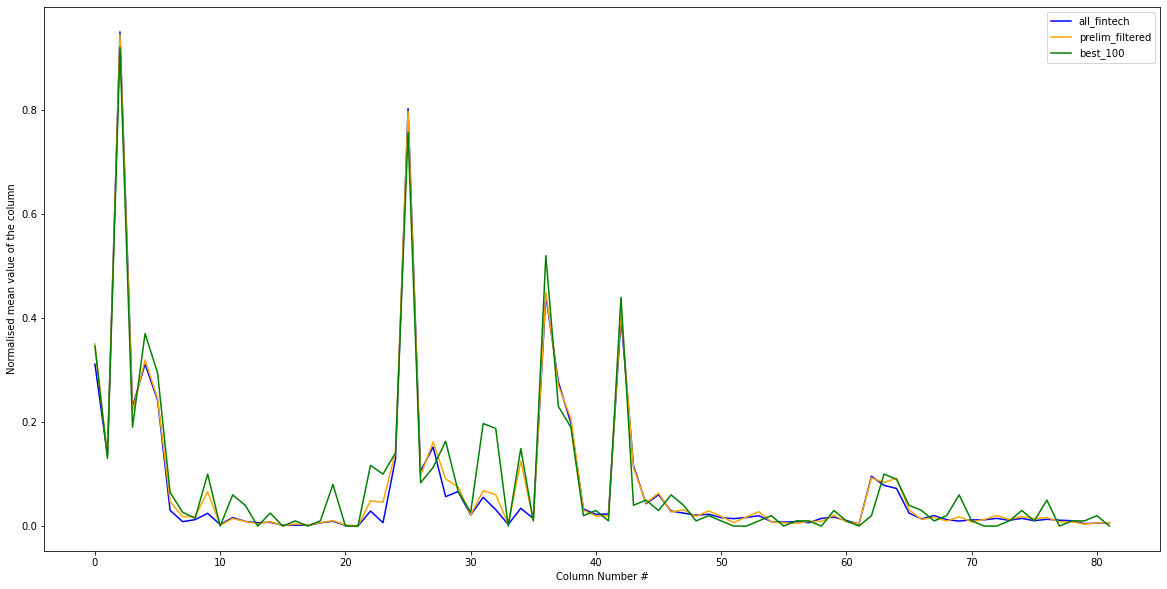

In [36]:
best_100_scaled_mean = []
for i in range(len(best_100_scaled.columns)):
    best_100_scaled_mean.append(best_100_scaled.iloc[:,i].mean())\

best_1300_scaled_mean = []
for i in range(len(best_1300_scaled.columns)):
    best_1300_scaled_mean.append(best_1300_scaled.iloc[:,i].mean())

best_4000_scaled_mean = []
for i in range(len(best_4000_scaled.columns)):
    best_4000_scaled_mean.append(best_4000_scaled.iloc[:,i].mean())

plt.figure(figsize=(20,10))
plt.plot(best_100_scaled.columns.to_list(), best_4000_scaled_mean, color='blue', label='all_fintech')
plt.plot(best_100_scaled.columns.to_list(), best_1300_scaled_mean, color='orange', label='prelim_filtered')
plt.plot(best_100_scaled.columns.to_list(), best_100_scaled_mean, color='green', label='best_100')
plt.xlabel("Column Number #")
plt.ylabel("Normalised mean value of the column")
plt.legend()
plt.show()

In [37]:
sorted_df = pd.DataFrame([best_4000_scaled_mean, best_1300_scaled_mean, best_100_scaled_mean], columns=list(best_100.columns.values))
sorted_df.head()

,employee_count,cat_commerce_shopping,cat_fin_services,cat_lending_invests,cat_payments,fd_rd_latest_investment,fd_rd_investment_type_series_unknown,fd_rd_investment_type_grant,fd_rd_investment_type_debt_financing,fd_rd_investment_type_pre_seed,fd_rd_investment_type_post_ipo_equity,fd_rd_investment_type_convertible_note,fd_rd_investment_type_equity_crowdfunding,fd_rd_investment_type_private_equity,fd_rd_investment_type_undisclosed,fd_rd_investment_type_post_ipo_debt,fd_rd_investment_type_corporate_round,fd_rd_investment_type_product_crowdfunding,fd_rd_investment_type_non_equity_assistance,fd_rd_investment_type_initial_coin_offering,fd_rd_investment_type_secondary_market,fd_rd_investment_type_post_ipo_secondary,fd_rd_num_invested_by_top_100,event_count,average_job_duration,gender_male,gender_female,degree_type,subject_Business,subject_STEM,subject_Arts_SoSc,num_exec,first_fund_raised,first_fund_post_money,first_fund_investor_count,has_parent,continent_NA,continent_EU,continent_AS,continent_SA,continent_AF,continent_OC,country_code_USA,country_code_GBR,country_code_IND,country_code_CHN,country_code_CAN,country_code_SGP,country_code_AUS,country_code_DEU,country_code_BRA,country_code_CHE,country_code_ESP,country_code_FRA,country_code_NLD,country_code_HKG,country_code_ISR,country_code_KOR,country_code_SWE,country_code_JPN,country_code_MEX,country_code_IDN,city_London,city_New York,city_San Francisco,city_Singapore,city_Toronto,city_Beijing,city_Mumbai,city_Los Angeles,city_Chicago,city_Sydney,city_Paris,city_São Paulo,city_Tokyo,city_Berlin,city_Boston,city_Stockholm,city_Shanghai,city_Tel Aviv,city_Amsterdam,city_Madrid
0,0.311429,0.136296,0.950123,0.229136,0.311358,0.242540,0.030281,0.008477,0.012412,0.024599,0.002765,0.016420,0.009012,0.006502,0.007243,0.001728,0.001811,0.001646,0.006173,0.009300,0.001358,0.0,0.028981,0.006507,0.129247,0.802634,0.105515,0.152049,0.056601,0.066461,0.021219,0.055378,0.031537,0.003101,0.034231,0.014568,0.442469,0.277531,0.197778,0.033086,0.022469,0.023210,0.399506,0.116049,0.042963,0.060247,0.028889,0.024938,0.020988,0.022716,0.016296,0.014321,0.016543,0.020000,0.008642,0.007654,0.008642,0.006420,0.014815,0.017284,0.010617,0.003951,0.095802,0.078272,0.072346,0.024938,0.013827,0.020247,0.012346,0.009630,0.011852,0.012099,0.014815,0.011111,0.014815,0.010370,0.013086,0.011358,0.010370,0.004691,0.005679,0.006420
1,0.350411,0.134630,0.945400,0.220643,0.319372,0.245646,0.047494,0.018138,0.018592,0.066380,0.001309,0.014585,0.008826,0.004488,0.008601,0.000748,0.004238,0.002244,0.006358,0.010471,0.002244,0.0,0.048492,0.046021,0.142515,0.797335,0.097205,0.161909,0.090845,0.074907,0.021749,0.068112,0.060413,0.003568,0.124650,0.011219,0.450262,0.270007,0.207180,0.030666,0.019447,0.019447,0.411369,0.112191,0.044129,0.063575,0.026926,0.031414,0.018699,0.029170,0.018699,0.006731,0.017203,0.027674,0.008227,0.005984,0.005236,0.008975,0.008975,0.020942,0.008227,0.004488,0.092745,0.083770,0.091997,0.031414,0.012715,0.017203,0.009723,0.017951,0.008227,0.012715,0.020194,0.012715,0.018699,0.014211,0.016455,0.008227,0.008227,0.003740,0.005984,0.006731
2,0.346000,0.130000,0.920000,0.190000,0.370000,0.295000,0.065000,0.026667,0.015000,0.100000,0.000000,0.060000,0.040000,0.000000,0.025000,0.000000,0.010000,0.000000,0.010000,0.080000,0.000000,0.0,0.116667,0.100000,0.141058,0.756749,0.083251,0.112718,0.163231,0.066652,0.026541,0.197143,0.187706,0.000000,0.149062,0.010000,0.520000,0.230000,0.190000,0.020000,0.030000,0.010000,0.440000,0.040000,0.050000,0.030000,0.060000,0.040000,0.010000,0.020000,0.010000,0.000000,0.000000,0.010000,0.020000,0.000000,0.010000,0.010000,0.000000,0.030000,0.010000,0.000000,0.020000,0.100000,0.090000,0.040000,0.030000,0.010000,0.020000,0.060000,0.010000,0.000000,0.000000,0.010000,0.030000,0.010000,0.050000,0.000000,0.010000,0.010000,0.020000,0.000000


In [38]:
sorted_df.sort_values(by=0, axis=1, ascending=False, inplace=True)
sorted_df.head()

,cat_fin_services,gender_male,continent_NA,country_code_USA,employee_count,cat_payments,continent_EU,fd_rd_latest_investment,cat_lending_invests,continent_AS,degree_type,cat_commerce_shopping,average_job_duration,country_code_GBR,gender_female,city_London,city_New York,city_San Francisco,subject_STEM,country_code_CHN,subject_Business,num_exec,country_code_IND,first_fund_investor_count,continent_SA,first_fund_raised,fd_rd_investment_type_series_unknown,fd_rd_num_invested_by_top_100,country_code_CAN,city_Singapore,country_code_SGP,fd_rd_investment_type_pre_seed,continent_OC,country_code_DEU,continent_AF,subject_Arts_SoSc,country_code_AUS,city_Beijing,country_code_FRA,country_code_JPN,country_code_ESP,fd_rd_investment_type_convertible_note,country_code_BRA,country_code_SWE,city_Paris,city_Tokyo,has_parent,country_code_CHE,city_Toronto,city_Boston,fd_rd_investment_type_debt_financing,city_Mumbai,city_Sydney,city_Chicago,city_Stockholm,city_São Paulo,country_code_MEX,city_Berlin,city_Shanghai,city_Los Angeles,fd_rd_investment_type_initial_coin_offering,fd_rd_investment_type_equity_crowdfunding,country_code_ISR,country_code_NLD,fd_rd_investment_type_grant,country_code_HKG,fd_rd_investment_type_undisclosed,event_count,fd_rd_investment_type_private_equity,country_code_KOR,city_Madrid,fd_rd_investment_type_non_equity_assistance,city_Amsterdam,city_Tel Aviv,country_code_IDN,first_fund_post_money,fd_rd_investment_type_post_ipo_equity,fd_rd_investment_type_corporate_round,fd_rd_investment_type_post_ipo_debt,fd_rd_investment_type_product_crowdfunding,fd_rd_investment_type_secondary_market,fd_rd_investment_type_post_ipo_secondary
0,0.950123,0.802634,0.442469,0.399506,0.311429,0.311358,0.277531,0.242540,0.229136,0.197778,0.152049,0.136296,0.129247,0.116049,0.105515,0.095802,0.078272,0.072346,0.066461,0.060247,0.056601,0.055378,0.042963,0.034231,0.033086,0.031537,0.030281,0.028981,0.028889,0.024938,0.024938,0.024599,0.023210,0.022716,0.022469,0.021219,0.020988,0.020247,0.020000,0.017284,0.016543,0.016420,0.016296,0.014815,0.014815,0.014815,0.014568,0.014321,0.013827,0.013086,0.012412,0.012346,0.012099,0.011852,0.011358,0.011111,0.010617,0.010370,0.010370,0.009630,0.009300,0.009012,0.008642,0.008642,0.008477,0.007654,0.007243,0.006507,0.006502,0.006420,0.006420,0.006173,0.005679,0.004691,0.003951,0.003101,0.002765,0.001811,0.001728,0.001646,0.001358,0.0
1,0.945400,0.797335,0.450262,0.411369,0.350411,0.319372,0.270007,0.245646,0.220643,0.207180,0.161909,0.134630,0.142515,0.112191,0.097205,0.092745,0.083770,0.091997,0.074907,0.063575,0.090845,0.068112,0.044129,0.124650,0.030666,0.060413,0.047494,0.048492,0.026926,0.031414,0.031414,0.066380,0.019447,0.029170,0.019447,0.021749,0.018699,0.017203,0.027674,0.020942,0.017203,0.014585,0.018699,0.008975,0.020194,0.018699,0.011219,0.006731,0.012715,0.016455,0.018592,0.009723,0.012715,0.008227,0.008227,0.012715,0.008227,0.014211,0.008227,0.017951,0.010471,0.008826,0.005236,0.008227,0.018138,0.005984,0.008601,0.046021,0.004488,0.008975,0.006731,0.006358,0.005984,0.003740,0.004488,0.003568,0.001309,0.004238,0.000748,0.002244,0.002244,0.0
2,0.920000,0.756749,0.520000,0.440000,0.346000,0.370000,0.230000,0.295000,0.190000,0.190000,0.112718,0.130000,0.141058,0.040000,0.083251,0.020000,0.100000,0.090000,0.066652,0.030000,0.163231,0.197143,0.050000,0.149062,0.020000,0.187706,0.065000,0.116667,0.060000,0.040000,0.040000,0.100000,0.010000,0.020000,0.030000,0.026541,0.010000,0.010000,0.010000,0.030000,0.000000,0.060000,0.010000,0.000000,0.000000,0.030000,0.010000,0.000000,0.030000,0.050000,0.015000,0.020000,0.000000,0.010000,0.000000,0.010000,0.010000,0.010000,0.010000,0.060000,0.080000,0.040000,0.010000,0.020000,0.026667,0.000000,0.025000,0.100000,0.000000,0.010000,0.000000,0.010000,0.020000,0.010000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.0


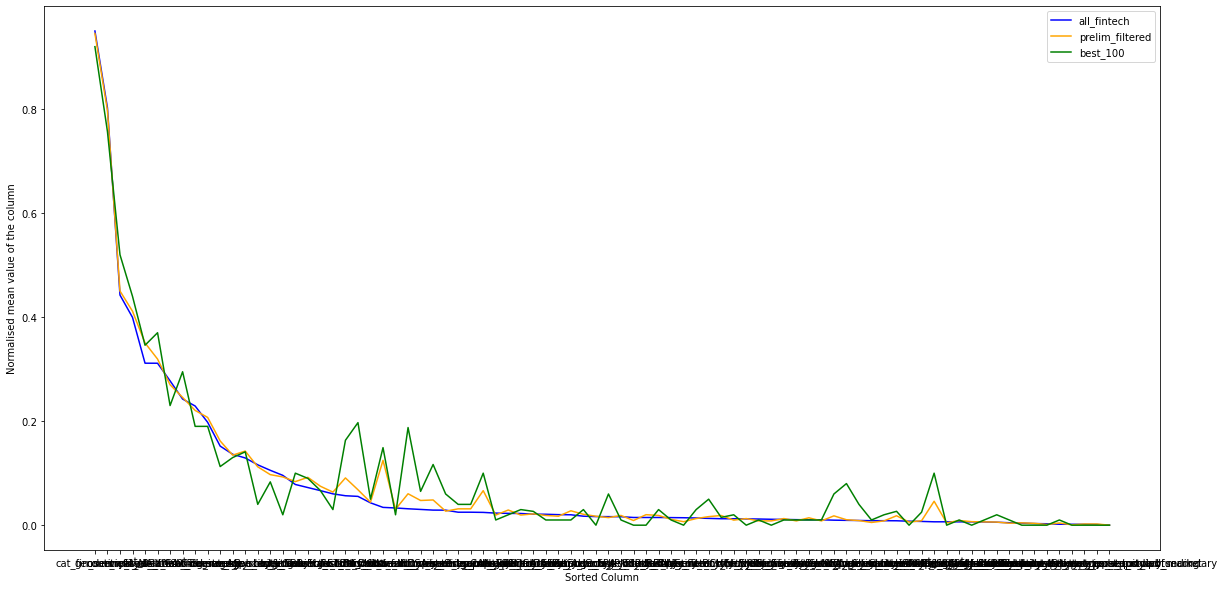

In [39]:
plt.figure(figsize=(20,10))
plt.plot(sorted_df.iloc[0].index.to_list(), list(sorted_df.iloc[0]), color='blue', label='all_fintech')
plt.plot(sorted_df.iloc[0].index.to_list(), list(sorted_df.iloc[1]), color='orange', label='prelim_filtered')
plt.plot(sorted_df.iloc[0].index.to_list(), list(sorted_df.iloc[2]), color='green', label='best_100')
plt.xlabel("Sorted Column")
plt.ylabel("Normalised mean value of the column")
plt.legend()
plt.show()

In [40]:
stat_useful = []

for i in range(len(best_100.columns)):
    feature_mean = best_4000.iloc[:, i].mean()
    tset, pval = ttest_1samp(best_100.iloc[:, i].values, feature_mean)
    
    if pval < 0.05:    # alpha value is 0.05 or 5%
        # only print rejected
        print("Rejecting null hypothesis for " + str(best_100.columns[i]))
        #stat_useful.append(df.columns[i])
        print("Feature mean for all: " + str(feature_mean))
        print("Feature mean for TOP 100: " + str(best_100.iloc[:, i].mean()))
        print('p-values',pval,'\n')
    # else:
    #     print("we are accepting null hypothesis")

Rejecting null hypothesis for employee_count
Feature mean for all: 2.18
Feature mean for TOP 100: 1.73
p-values 1.7858242560455863e-06 

Rejecting null hypothesis for fd_rd_latest_investment
Feature mean for all: 1.6977777777777778
Feature mean for TOP 100: 1.18
p-values 2.3567037329470162e-11 

Rejecting null hypothesis for fd_rd_investment_type_series_unknown
Feature mean for all: 0.3330864197530864
Feature mean for TOP 100: 0.13
p-values 4.467712168125856e-06 

Rejecting null hypothesis for fd_rd_investment_type_debt_financing
Feature mean for all: 0.18617283950617283
Feature mean for TOP 100: 0.03
p-values 2.914155105049075e-10 

Rejecting null hypothesis for fd_rd_investment_type_pre_seed
Feature mean for all: 0.19679012345679012
Feature mean for TOP 100: 0.4
p-values 0.003614200041793607 

Rejecting null hypothesis for fd_rd_investment_type_post_ipo_equity
Feature mean for all: 0.013827160493827161
Feature mean for TOP 100: 0.0
p-values 0.0 

Rejecting null hypothesis for fd_rd_i

In [41]:
# Normalised Values here, see positive relationships

for i in range (len(best_100.columns)):
    if best_100.iloc[:,i].mean() > best_1300.iloc[:,i].mean() \
    and best_100.iloc[:,i].mean() > best_4000.iloc[:,i].mean() \
    and best_1300.iloc[:,i].mean() > best_4000.iloc[:,i].mean():
        print(str(best_100.columns[i])+" is a positively important feature !\nThe average value at TOP 100: " +str(best_100.iloc[:,i].mean()) +";"+\
             "\nwhile the average value at Prelim Filtered: " +str(best_1300.iloc[:,i].mean()) +";"+\
              "\nand that the average value at All Fintech: " +str(best_4000.iloc[:,i].mean()) +"\n")

cat_payments is a positively important feature !
The average value at TOP 100: 0.37;
while the average value at Prelim Filtered: 0.3193717277486911;
and that the average value at All Fintech: 0.31135802469135804

fd_rd_investment_type_pre_seed is a positively important feature !
The average value at TOP 100: 0.4;
while the average value at Prelim Filtered: 0.2655198204936425;
and that the average value at All Fintech: 0.19679012345679012

fd_rd_investment_type_non_equity_assistance is a positively important feature !
The average value at TOP 100: 0.02;
while the average value at Prelim Filtered: 0.012715033657442034;
and that the average value at All Fintech: 0.012345679012345678

fd_rd_num_invested_by_top_100 is a positively important feature !
The average value at TOP 100: 0.35;
while the average value at Prelim Filtered: 0.29094988780852654;
and that the average value at All Fintech: 0.23185185185185186

first_fund_investor_count is a positively important feature !
The average value

In [42]:
# Normalised Values here, see inverse relationships

for i in range (len(best_100.columns)):
    if best_100.iloc[:,i].mean() < best_1300.iloc[:,i].mean() \
    and best_100.iloc[:,i].mean() < best_4000.iloc[:,i].mean() \
    and best_1300.iloc[:,i].mean() < best_4000.iloc[:,i].mean() and best_100.iloc[:,i].mean() != 0:
        print(str(best_100.columns[i])+" is an inversely important feature!\nThe average value at TOP 100: " +str(best_100.iloc[:,i].mean()) +";"+\
             "\nwhile the average value at Prelim Filtered: " +str(best_1300.iloc[:,i].mean()) +";"+\
              "\nand that the average value at All Fintech: " +str(best_4000.iloc[:,i].mean()) +"\n")

employee_count is an inversely important feature!
The average value at TOP 100: 1.73;
while the average value at Prelim Filtered: 2.1024682124158565;
and that the average value at All Fintech: 2.18

cat_commerce_shopping is an inversely important feature!
The average value at TOP 100: 0.13;
while the average value at Prelim Filtered: 0.13462976813762154;
and that the average value at All Fintech: 0.1362962962962963

cat_fin_services is an inversely important feature!
The average value at TOP 100: 0.92;
while the average value at Prelim Filtered: 0.9454001495886313;
and that the average value at All Fintech: 0.9501234567901234

cat_lending_invests is an inversely important feature!
The average value at TOP 100: 0.19;
while the average value at Prelim Filtered: 0.2206432311144353;
and that the average value at All Fintech: 0.2291358024691358

fd_rd_investment_type_series_unknown is an inversely important feature!
The average value at TOP 100: 0.13;
while the average value at Prelim Filte

In [43]:
# Take STEM as an example...
index = best_100.columns.get_loc('subject_STEM')
print("Subject STEM of best 100: ", best_100.iloc[:,index].mean())
print("Subject STEM of best 1300: ", best_1300.iloc[:,index].mean())
print("Subject STEM of best 4000: ", best_4000.iloc[:,index].mean())

# Therefore, STEM is regarded as positively important here. Since it has a consistantly
# larger ratio over each of the comparison

Subject STEM of best 100:  0.13330386117150822
Subject STEM of best 1300:  0.14981394419158098
Subject STEM of best 4000:  0.13292146756331524


In [44]:
df.head()

,company_name,status,category_group_list,num_funding_rounds,total_funding_usd,founded_on,employee_count,cat_commerce_shopping,cat_fin_services,cat_lending_invests,cat_payments,fd_rd_latest_investment,fd_rd_investment_type_series_unknown,fd_rd_investment_type_grant,fd_rd_investment_type_debt_financing,fd_rd_investment_type_pre_seed,fd_rd_investment_type_post_ipo_equity,fd_rd_investment_type_convertible_note,fd_rd_investment_type_equity_crowdfunding,fd_rd_investment_type_private_equity,fd_rd_investment_type_undisclosed,fd_rd_investment_type_post_ipo_debt,fd_rd_investment_type_corporate_round,fd_rd_investment_type_product_crowdfunding,fd_rd_investment_type_non_equity_assistance,fd_rd_investment_type_initial_coin_offering,fd_rd_investment_type_secondary_market,fd_rd_investment_type_post_ipo_secondary,fd_rd_num_invested_by_top_100,event_count,average_job_duration,gender_male,gender_female,degree_type,subject_Business,subject_STEM,subject_Arts_SoSc,num_exec,first_fund_raised,first_fund_post_money,first_fund_investor_count,has_parent,continent_NA,continent_EU,continent_AS,continent_SA,continent_AF,continent_OC,country_code_USA,country_code_GBR,country_code_IND,country_code_CHN,country_code_CAN,country_code_SGP,country_code_AUS,country_code_DEU,country_code_BRA,country_code_CHE,country_code_ESP,country_code_FRA,country_code_NLD,country_code_HKG,country_code_ISR,country_code_KOR,country_code_SWE,country_code_JPN,country_code_MEX,country_code_IDN,city_London,city_New York,city_San Francisco,city_Singapore,city_Toronto,city_Beijing,city_Mumbai,city_Los Angeles,city_Chicago,city_Sydney,city_Paris,city_São Paulo,city_Tokyo,city_Berlin,city_Boston,city_Stockholm,city_Shanghai,city_Tel Aviv,city_Amsterdam,city_Madrid,tree_prediction,average_momentum,predicted_momentum_using_degree_2
0,Betmatch,operating,Unknown,2.0,4150000.0,2.9671,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.904100,1.000000,0.000000,2.000000,0.000000,0.000000,1.000000,1.0,4150000.0,0.0,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,7.442526,7.941968
1,Beatdapp,operating,Unknown,4.0,2421799.0,3.0767,2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4.372262,0.875000,0.125000,0.625000,0.250000,0.125000,0.000000,8.0,2419299.0,0.0,10.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,7.920122,7.661982
2,Mobius,operating,"Apps,Financial Services,Payments,Software",2.0,39500000.0,4.0767,3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,5.994525,1.000000,0.000000,0.250000,0.000000,0.250000,0.000000,4.0,500000.0,0.0,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,7.904976,7.573066
3,TrustToken,operating,"Commerce and Shopping,Financial Services,Other...",4.0,21700000.0,4.0767,2,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,5.0,3.621271,0.882353,0.117647,0.411765,0.117647,0.176471,0.058824,17.0,1700000.0,0.0,5.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,6.765487,7.346533
4,BrikkApp,operating,"Commerce and Shopping,Financial Services,Other...",2.0,542698.0,3.0767,1,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,539388.0,0.0,2.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,7.921425,7.157653


## The End -